**Hands-on ML Workshop**


Task: Train a Simple Machine Learning Model in Python


Tools: Google Colab: iris.csv

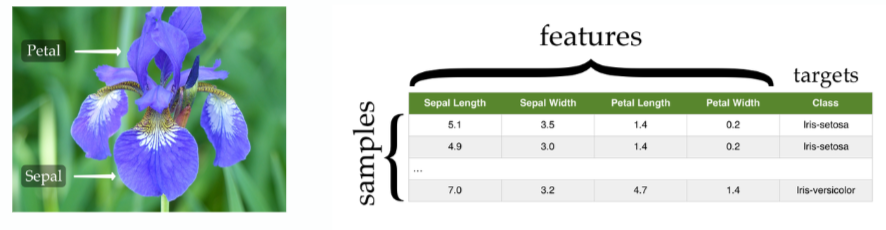

# Data Preprocessing

1.Get and Import Iris Data

In [2]:
import pandas as pd

# Load the Iris dataset from the CSV file
iris_df = pd.read_csv("IrisExample.csv")

2.Inspect data

In [3]:
# Display the Iris dataset
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Display the df information
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Count data in each species (class)

iris_df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


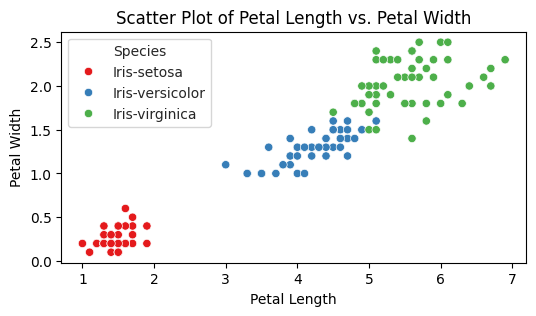

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the color palette to a categorical color scheme
sns.set_palette("Set1")

# Create a scatter plot using Seaborn
plt.figure(figsize=(6, 3))
sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='species')

sns.set_style("white")  # or sns.set_style("ticks")
# Set plot properties
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Species')

# Show the plot
plt.show()

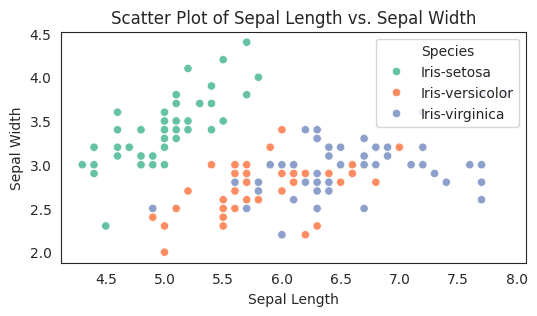

In [7]:
# Plot sepal_length	vs sepal_width
# Create a scatter plot using Seaborn

# Set the color palette to a categorical color scheme
sns.set_palette("Set2")

# Scatter plot: Sepal Length vs Sepal Width
plt.figure(figsize=(6, 3))
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='species')
sns.set_style("white")  # or sns.set_style("ticks")

# Set plot properties
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species')

# Show the plot
plt.show()

3.Data Splitting

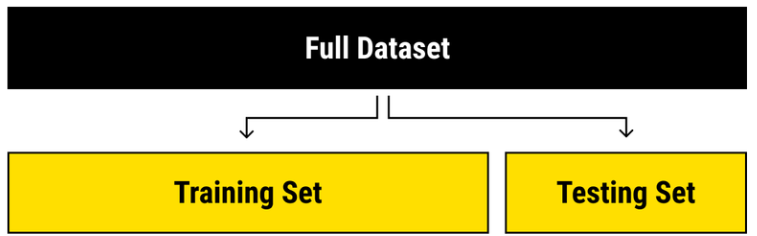

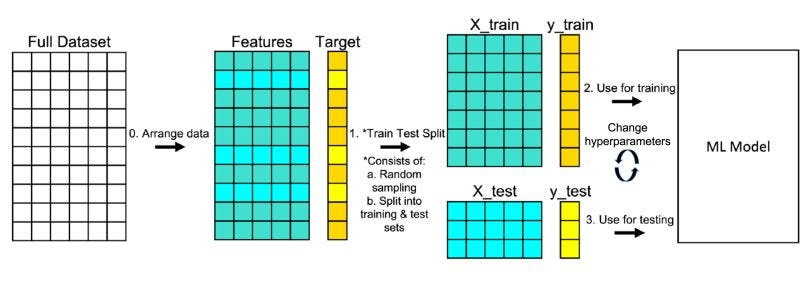

In [8]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
#Dropout label
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [10]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [12]:
#Inspect X after drop Species column
print('X.shape : ',X.shape)
print('y.shape :',y.shape)

X.shape :  (150, 4)
y.shape : (150,)


In [13]:
#Split to train 80 test20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [14]:
#Inspect shape of the data after train_test_split
print('X train : ', X_train.shape)
print('X test :', X_test.shape)
# Add y
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X train :  (120, 4)
X test : (30, 4)
y_train.shape: (120,)
y_test.shape: (30,)


# Create and Train a Model : DecisionTreeClassifier

 Create and configure the model

In [15]:
from sklearn.tree import DecisionTreeClassifier
# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(max_depth=3 , min_samples_leaf=5 , random_state=42)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

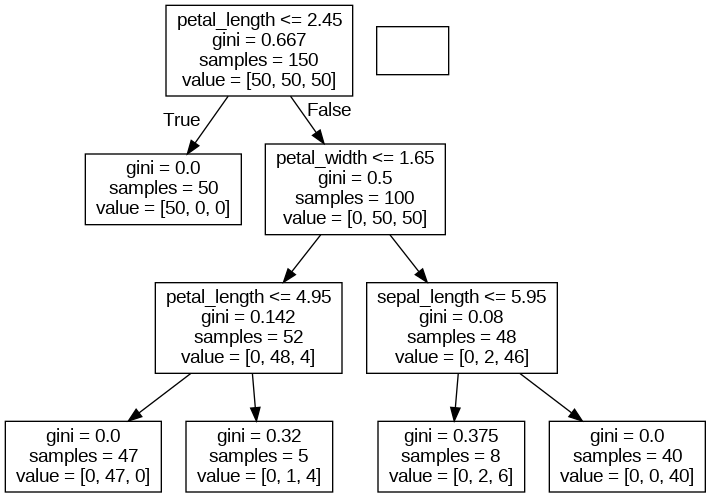

In [17]:
# Plotting of decission tree
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus

features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Train the model

In [18]:
# Defining an object for DTC and fitting for train dataset
dt = DecisionTreeClassifier(random_state=42)
#fit train data (X_train) and label (y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Make Predictions

In [19]:
y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [20]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [21]:
y_test

,species
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor
31,Iris-setosa
64,Iris-versicolor
141,Iris-virginica
68,Iris-versicolor
82,Iris-versicolor


Evaluate the Model

In [22]:
#Plot Accuracy score
from sklearn.metrics import accuracy_score

# Accuracy score
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

#plot Accuracy of Decision Tree-Train of y_pred_train, y_train
print('Accuracy of Decision Tree-Train: ',  train_accuracy)

#plot Accuracy of Decision Tree-Test of y_pred, y_test
print('Accuracy of Decision Tree-Test: ',  test_accuracy)

Accuracy of Decision Tree-Train:  0.9916666666666667
Accuracy of Decision Tree-Test:  0.9


In [23]:
#Classification for test before hyperparameter tuning
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



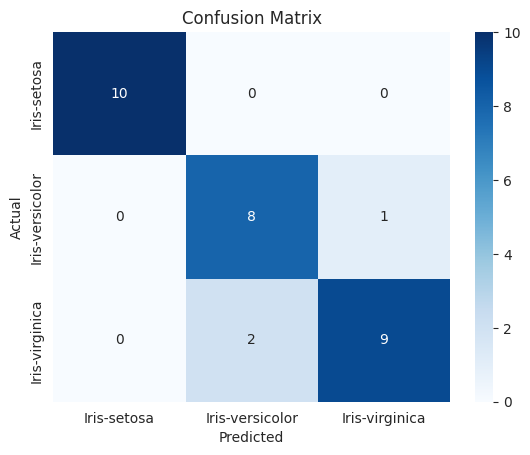

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Task!!!**

Try adjust parameter max_depth min_samples_split or train, test size to get better performance

**Hyperparameter Tuning**

How do you know what values of parameters should be selected for the best model performance?


In [25]:
#Grid Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dt = DecisionTreeClassifier(random_state=42)

params = {'max_depth' : [2,3,4,5,6,7,8,9],
        'min_samples_split': [2,3,4,5,6,7,8,9],
        'min_samples_leaf': [2,3,4,5,6,7,8,9]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [26]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=42)

dt.fit(X_train, y_train)

y_pred_train2 = dt.predict(X_train)
y_prob_train2 = dt.predict_proba(X_train)[:,1]

y_pred2 = dt.predict(X_test)
y_prob2 = dt.predict_proba(X_test)[:,1]

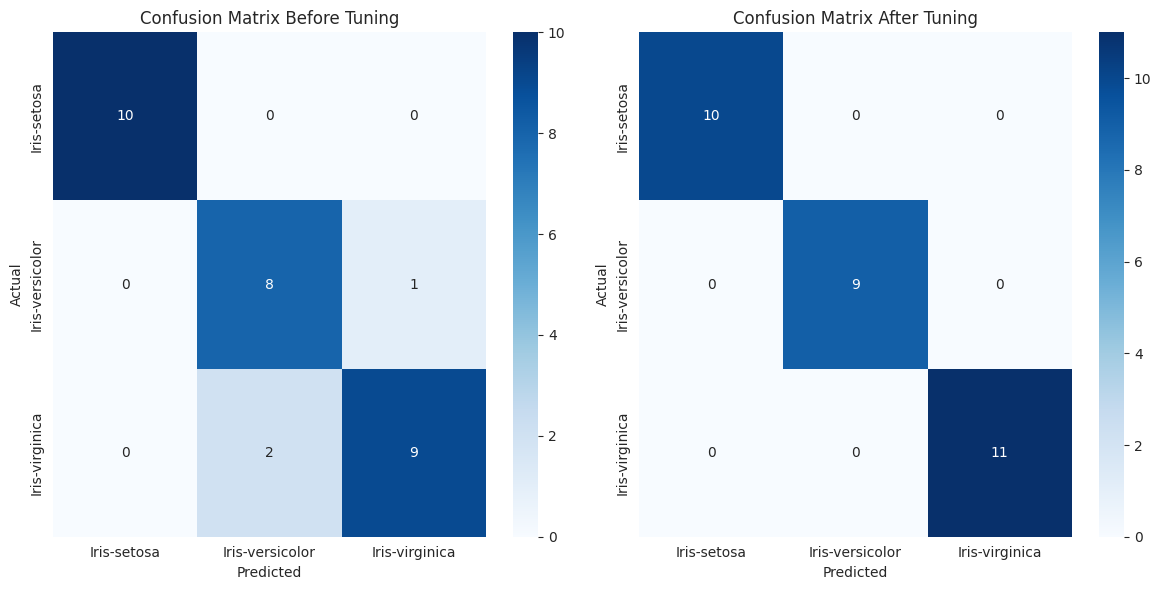

In [27]:

cm2 = confusion_matrix(y_test, y_pred2)

#Plot both confusion matrices together for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=dt.classes_, yticklabels=dt.classes_)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix Before Tuning')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=dt.classes_, yticklabels=dt.classes_)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix After Tuning')

plt.tight_layout()
plt.show()

In [28]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train2, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred2, y_test))

Accuracy of Decision Tree-Train:  0.9583333333333334
Accuracy of Decision Tree-Test:  1.0


In [29]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

